In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

matplotlib.style.use('ggplot')
%matplotlib inline

/home/fogside/virtualenv/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/fogside/virtualenv/py2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
coding_blast = pd.read_csv("../data/uniref_alignment/coding_aligned_1part.csv")
coding_blast.ix[3454:3460]

,queryId,subjectId,percIdentity,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore
3454,UC009VIW.2,UniRef50_U3J5N1,82.76,29,5,0,2870,2956,257,285,2.000000e-04,53.1
3455,UC009VIW.2,UniRef50_Q9H7J9,57.92,183,18,4,805,1176,1,183,2.000000e-45,171.0
3456,UC009VIW.2,UniRef50_F7DP97,89.58,96,7,1,172,459,36,128,1.000000e-43,165.0
3457,UC009VIW.2,UniRef50_F6YMS7,80.95,105,19,1,829,1140,135,239,4.000000e-42,169.0
3458,UC009VIW.2,UniRef50_F6YMS7,51.47,136,62,2,190,591,1,134,7.000000e-27,123.0
3459,UC009VIW.2,UniRef50_F6YMS7,85.71,21,3,0,2020,2082,320,340,2.000000e-02,40.0
3460,UC009VIW.2,UniRef50_F6YMS7,71.43,14,4,0,1976,2017,305,318,2.000000e-02,26.6


In [19]:
lnc_blast = pd.read_csv("../data/uniref_alignment/lnc_aligned_1part.csv")
lnc_blast.head(3)

,queryId,subjectId,percIdentity,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore
0,lnc-C8orf56-1:8,UniRef50_A0A196M972,33.87,62,35,1,103,270,299,360,1.4,35.4
1,lnc-C8orf56-1:8,UniRef50_G0J6L1,40.48,42,25,0,46,171,541,582,2.2,35.0
2,lnc-C8orf56-1:8,UniRef50_A0A0C1MXM1,41.03,39,23,0,20,136,1280,1318,4.3,33.9


In [104]:
data_lnc = pd.read_csv("../scripts/my_model/lnc_table.csv.txt", sep = '\t', index_col=0)
data_lnc['TYPE'] = ['non-coding']*len(data_lnc)
data_lnc.head(3)

,mRNA_size,ORF_size,fickett_score,hexamer,gc_content,kozak34,kozak21,kozak6,exon_max,exon_mean,exon_num,TYPE
sname,,,,,,,,,,,,
LNC-C8ORF56-1:8,291,291,0.8012,-0.073170,0.474227,0,0,0,217,144.500000,2,non-coding
LNC-PRYP4-3:1,211,211,0.5306,-0.159095,0.364929,0,0,0,0,0.000000,0,non-coding
LNC-TTLL7-2:5,1991,1991,0.4018,-0.475816,0.433451,0,0,0,1735,662.666667,3,non-coding


In [106]:
data_coding = pd.read_csv("../scripts/my_model/coding_table.csv.txt", sep = '\t', index_col=0)
data_coding['TYPE'] = ['coding']*len(data_coding)
data_coding.head(3)

,mRNA_size,ORF_size,fickett_score,hexamer,gc_content,kozak34,kozak21,kozak6,exon_max,exon_mean,exon_num,TYPE
sname,,,,,,,,,,,,
UC001AAA.3,1652,1651,0.6045,-0.216455,0.554479,0,0,0,1188,549.666667,3,coding
UC010NXQ.1,1488,1487,0.6201,-0.131265,0.553763,0,0,0,1006,495.000000,3,coding
UC010NXR.1,1595,1594,0.5501,-0.230965,0.552351,0,0,0,1188,530.666667,3,coding


In [107]:
data_full = pd.concat((data_lnc, data_coding.ix[:len(data_lnc),:]))
print(data_full.shape)
data_full.to_csv("../data/new_data/full_data_train.csv")
data_full[:3]

(194645, 12)


,mRNA_size,ORF_size,fickett_score,hexamer,gc_content,kozak34,kozak21,kozak6,exon_max,exon_mean,exon_num,TYPE
sname,,,,,,,,,,,,
LNC-C8ORF56-1:8,291,291,0.8012,-0.073170,0.474227,0,0,0,217,144.500000,2,non-coding
LNC-PRYP4-3:1,211,211,0.5306,-0.159095,0.364929,0,0,0,0,0.000000,0,non-coding
LNC-TTLL7-2:5,1991,1991,0.4018,-0.475816,0.433451,0,0,0,1735,662.666667,3,non-coding


In [108]:
X = data_full.ix[:, :-1]
y = data_full.ix[:, "TYPE"]

______________

# Explorations

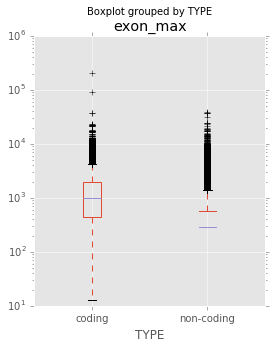

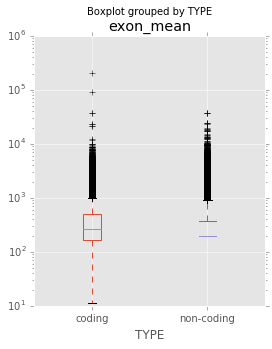

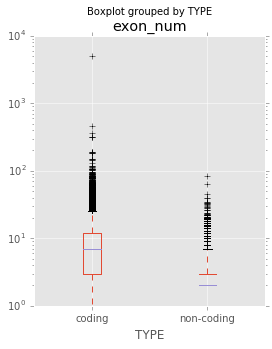

In [109]:
for plt_indx, column in enumerate(('exon_max','exon_mean','exon_num')):
    data_full.boxplot(column=column, by='TYPE', figsize=(4,5), )
    plt.semilogy()
#     if column in ('mRNA_size','CDS_size'):
#         plt.semilogy()

In [35]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data_full.ix[:, 4:]), columns=data_full.columns[4:], index=data_full.index)
scaled_df.head()

,gc_content,kozak34,kozak21,kozak6,exon_max,exon_mean,exon_num,TYPE
sname,,,,,,,,
LNC-C8ORF56-1:8,0.499186,0.0,0.0,0.0,0.001058,0.000705,0.000395,0.0
LNC-PRYP4-3:1,0.384136,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
LNC-TTLL7-2:5,0.456264,1.0,0.0,1.0,0.008463,0.003232,0.000592,0.0
LNC-CLEC18B-3:5,0.492536,1.0,1.0,0.0,0.001629,0.001173,0.000790,0.0
LNC-GPR119-1:1,0.482829,1.0,0.0,1.0,0.002078,0.000664,0.002369,0.0


In [ ]:
from scipy.stats import gaussian_kde


# palette = ['#e41a1c', '#377eb8', '#4eae4b', 
#                    '#994fa1', '#ff8101', '#fdfc33', 
#                    '#a8572c', '#f482be', '#999999']

palette = ["b", "r"]

classes = list(set(data_full["TYPE"]))

color_map = dict(zip(classes, palette))
colors = [color_map[i] for i in data_full["TYPE"]]
print(color_map)

df = scaled_df
axarr = scatter_matrix(df.ix[:,:-1], alpha=0.1, figsize=(15, 15), c = colors, diagonal=None, grid=False)
factor = "TYPE"

for rc in range(4, len(df.columns)):
    for group in classes:
        y = df[df[factor] == group].ix[:,rc].values
        gkde = gaussian_kde(y)
        ind = np.linspace(y.min(), y.max(), 1000)
        axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])


plt.show()

_______

In [47]:
df = coding_blast
max_ind = np.argmax(df[df.queryId == 'UC009VIW.2'].percIdentity)
print max_ind

3394


In [66]:
import tqdm

def get_new_blast(df, thresh = 1e-1):
    
    uniq_ids = np.unique(df.queryId)
    print("Unique Ids:", len(uniq_ids))
    indxs = []
    
    for i in tqdm.trange(len(uniq_ids)):
        m_id = np.argmin(df[df.queryId == uniq_ids[i]].eVal)
        indxs.append(m_id)
#         if m_id <= thresh:
#             indxs.append(np.argmin(df[df.queryId == i].eVal))
#         if max_id >=thresh:
#             indxs.append(np.argmax(df[df.queryId == i].percIdentity))
    
    dt = pd.concat([df.ix[i] for i in indxs], axis = 1).T
    dt.index = range(len(dt))
    return dt

In [161]:
len(lnc_blast)

18191315

In [67]:
new_blast_lnc = get_new_blast(lnc_blast.ix[:1136957])

100%|██████████| 4664/4664 [05:18<00:00, 15.08it/s]

('Unique Ids:', 4664)


In [69]:
new_blast_coding = get_new_blast(coding_blast)

100%|██████████| 455/455 [00:09<00:00, 46.68it/s]

('Unique Ids:', 455)


In [71]:
new_blast_coding.head(2)

,queryId,subjectId,percIdentity,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore
0,UC001AAA.3,UniRef50_UPI0007DC72A0,81.82,88,14,2,656,913,760,847,9e-70,140
1,UC001AAC.4,UniRef50_A0A096LNU2,96.91,162,3,2,235,717,62,222,5e-138,304


In [76]:
new_blast_coding["TYPE"] = 'coding'
new_blast_lnc["TYPE"] = 'non-coding'

data_full_blast = pd.concat((new_blast_coding, new_blast_lnc), axis = 0)

In [77]:
data_full_blast.shape

(5119, 13)

# Blast data visualisations

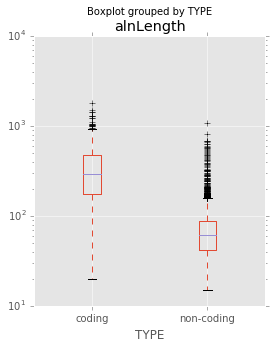

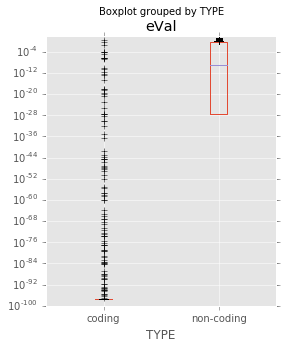

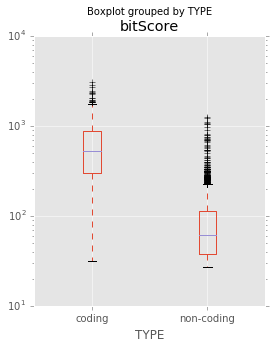

In [91]:
for plt_indx, column in enumerate(('alnLength','eVal','bitScore')):
#     plt.title(column)
    data_full_blast.boxplot(column=column, by='TYPE', figsize=(4,5), )
    
    plt.semilogy()
    if column == 'eVal':
        plt.ylim((1e-100, 1e2))
    
    plt.show()

#     if column in ('eVal, bitScore'):
#         plt.semilogy()

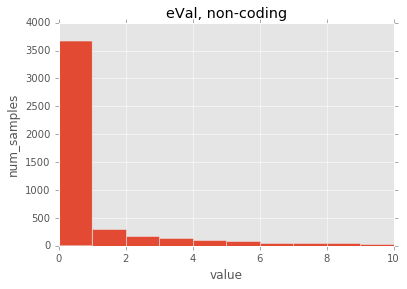

In [101]:
plt.hist(data_full_blast[data_full_blast.TYPE=='non-coding'].eVal)
plt.xlabel('value')
plt.ylabel('num_samples')
plt.title("eVal, non-coding")

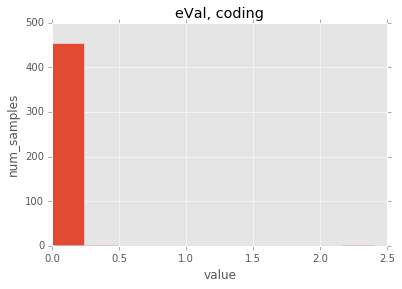

In [100]:
plt.hist(data_full_blast[data_full_blast.TYPE=='coding'].eVal)
plt.xlabel('value')
plt.ylabel('num_samples')
plt.title("eVal, coding")

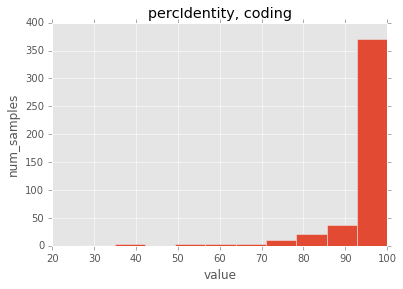

In [102]:
plt.hist(data_full_blast[data_full_blast.TYPE=='coding'].percIdentity)
plt.xlabel('value')
plt.ylabel('num_samples')
plt.title("percIdentity, coding")

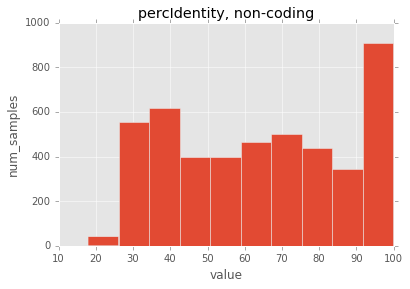

In [103]:
plt.hist(data_full_blast[data_full_blast.TYPE=='non-coding'].percIdentity)
plt.xlabel('value')
plt.ylabel('num_samples')
plt.title("percIdentity, non-coding")

## Other features visualisations

In [158]:
def hist_col(col, data_full):
    bins = np.linspace(min(data_full[col]), max(data_full[col])/100, 100)
    print(min(data_full[col]))
    print(max(data_full[col]))
#     bins = (min(data_full[col], ))
    plt.figure(figsize=(8,5))
    plt.hist(data_full[data_full.TYPE=='non-coding'][col],bins=bins, label='non-coding')
    plt.hist(data_full[data_full.TYPE=='coding'][col],bins=bins, label='coding')
    plt.xlabel('value')
    plt.ylabel('num_samples')
#     plt.semilogy()
    plt.legend()
    plt.title(col)

0.0
205011.0


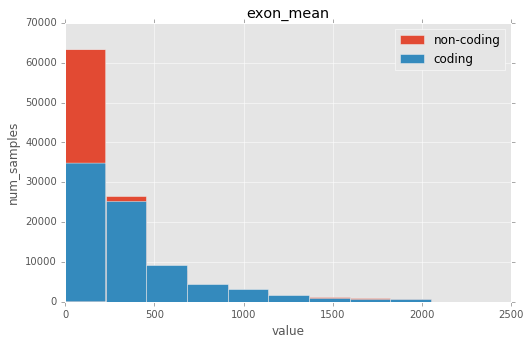

In [149]:
hist_col('exon_mean', data_full)

0
205011


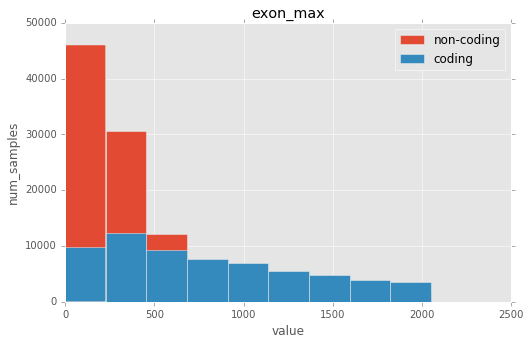

In [150]:
hist_col('exon_max', data_full)

0
5065


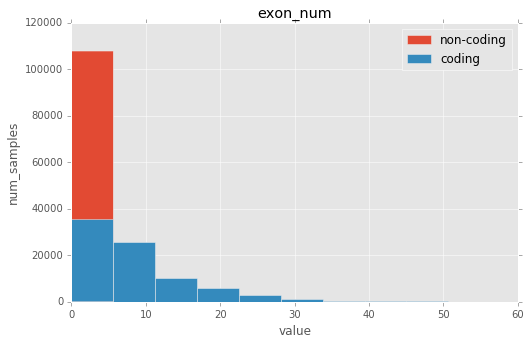

In [151]:
hist_col('exon_num', data_full)

17.89
100.0


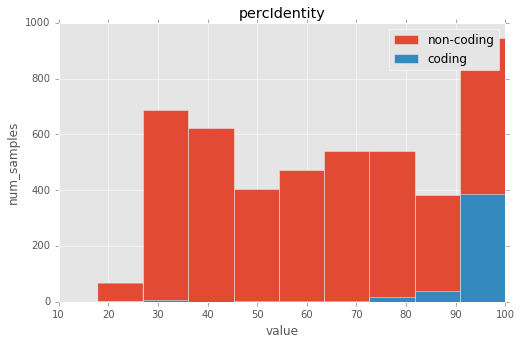

In [154]:
hist_col('percIdentity', data_full_blast)

0.0
10.0


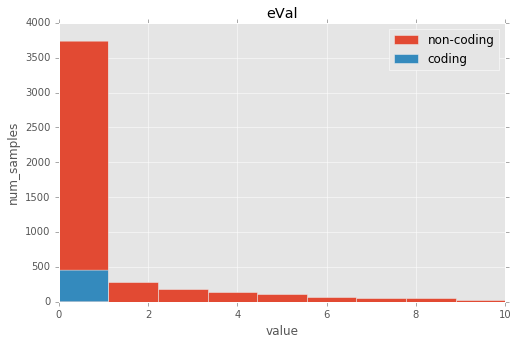

In [155]:
hist_col('eVal', data_full_blast)

-1
244296


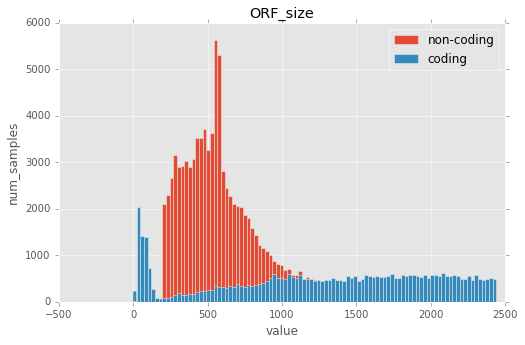

In [159]:
hist_col('ORF_size', data_full)

-1
244296


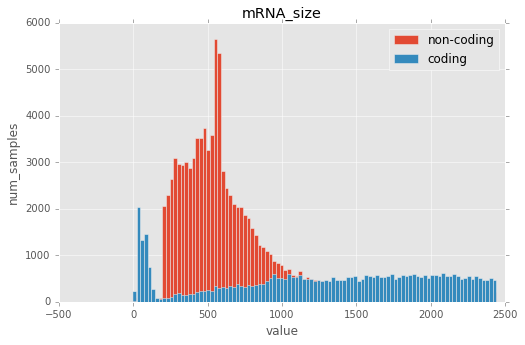

In [160]:
hist_col('mRNA_size', data_full)

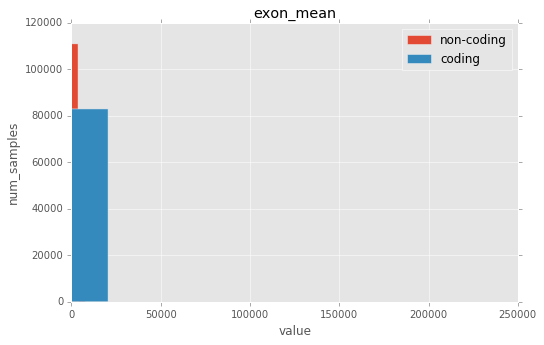

In [139]:
# bins = np.linspace(-10, 10, 100)
plt.figure(figsize=(8,5))
plt.hist(data_full[data_full.TYPE=='non-coding']['exon_mean'], label='non-coding')
plt.hist(data_full[data_full.TYPE=='coding']['exon_mean'], label='coding')
plt.xlabel('value')
plt.ylabel('num_samples')
#     plt.semilogy()
plt.legend()
plt.title('exon_mean')